<a href="https://colab.research.google.com/github/bonitr02/sqlite_database_operations/blob/main/hha504_assgn3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Load packages

In [133]:
! pip install sqlalchemy
from sqlalchemy import create_engine
import sqlite3
import pandas as pd
from tabulate import tabulate
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from IPython import display

# Hospital Dataset 1: Mount Sinai Queens

## Import data Hospital 1

In [ ]:
df = pd.read_csv('/content/131624096_mount-sinai-queens_chargemaster.csv')

<ipython-input-30-00c9927208ca>:1: DtypeWarning: Columns (9,10,12,13,14,15,17,19,20,21,22,23,24,27,28,29,31,33,34,35,36,38,41,43,45,47,48,49,50,52) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/131624096_mount-sinai-queens_chargemaster.csv')


In [ ]:
df.shape
#114893 rows and 55 columns

(114893, 55)

In [ ]:
df.head(10)

,CHARGE CODE,CHARGE DESC,ALTERNATE DESCRIPTION,DEPARTMENT CODE,DEPARTMENT NAME,EFFECTIVE DATE,RATE CHARGED,TP RATE (340B),GENERAL CPT4 CODE,GENERAL MODIFER 1,...,BC IP MODIFIER2 EFF DATE,BC OP REV CODE,BC OP HCPCS CODE,BC OP HCPCS EFF DATE,BC OP MODIFIER1,BC OP MODIFIER1 EFF DATE,BC OP MODIFIER2,BC OP MODIFIER2 EFF DATE,REVENUE CODE INPATIENT,REVENUE CODE OUTPATIENT
0,10300300,NON ESRD HEMO INPT UNIT,NON ESRD HEMO INPT UNIT,103,DIALYSIS,12/1/18,2150.0,0.0,90935,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,801.0,801.0
1,10300500,NON ESRD HEMO ED IN DIALYS UNI,NON ESRD HEMO ED IN DIALYS UNI,103,DIALYSIS,12/1/18,1500.0,0.0,90935,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,821.0,821.0
2,10300600,INPT CAPD TREATMENT,INPT CAPD TREATMENT,103,DIALYSIS,1/1/19,1150.0,0.0,90945,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,803.0,803.0
3,10300700,ESRD HEMO ED IN DIALYS UNIT,ESRD HEMO ED IN DIALYS UNIT,103,DIALYSIS,12/1/18,1500.0,0.0,G0257,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,821.0,821.0
4,10300800,ESRD HEMO INPT UNIT,ESRD HEMO INPT UNIT,103,DIALYSIS,12/1/18,1700.0,0.0,90935,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,801.0,801.0
5,10301000,ESRD HEMO INPT DIALYSIS UNIT,ESRD HEMO INPT DIALYSIS UNIT,103,DIALYSIS,12/1/18,1500.0,0.0,90935,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,801.0,801.0
6,10303200,CCPD CYCLER INPT,CCPD CYCLER INPT,103,DIALYSIS,1/1/19,1150.0,0.0,90945,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,804.0,804.0
7,10303400,NONESRD ULTRAFLTR IP DIALY UNI,NONESRD ULTRAFLTR IP DIALY UNI,103,DIALYSIS,12/1/18,1150.0,0.0,90945,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,881.0,881.0
8,10304600,ESRD ULTRAFLTR INPT UNIT,ESRD ULTRAFLTR INPT UNIT,103,DIALYSIS,1/1/19,1150.0,0.0,90945,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,881.0,881.0
9,10304700,ESRD ULTRAFLTR IP DIALYSIS UNI,ESRD ULTRAFLTR IP DIALYSIS UNI,103,DIALYSIS,12/1/18,1150.0,0.0,90945,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,881.0,881.0


In [ ]:
df.columns

## Data cleaning Hospital 1



In [ ]:
# Drop empty columns
df.dropna(how='all', axis=1, inplace=True)
print(df)

#Results in 114893 rows and 48 columns

In [ ]:
# Check for missing values in a column
print(df.isnull().sum())
# Results in only a few columns not missing values: CHARGE CODE, CHARGE DESC, ALTERNATE DESCRIPTION, DEPARTMENT CODE, DEPARTMENT NAME, EFFECTIVE DATE, RATE CHARGED, TP RATE (340B), REVENUE CODE INPATIENT, REVENUE CODE OUTPATIENT

In [ ]:
df.drop_duplicates(inplace=True)
# No duplicate rows identified

In [ ]:
#Rename columns
newDF=df.rename(columns={'CHARGE CODE': 'CHARGEcode', 'CHARGE DESC':'CHARGEdesc', 'ALTERNATE DESCRIPTION': 'ALTdesc', 'DEPARTMENT CODE':'DEPTcode', 'DEPARTMENT NAME':'DEPTname', 'EFFECTIVE DATE':'EFFECTIVEdate', 'RATE CHARGED':'RATEcharged', "TP RATE (340B)":'TP_RATE_340B', 'REVENUE CODE INPATIENT':'REVENUEcodeINPT', 'REVENUE CODE OUTPATIENT':'REVENUEcodeOPT'})

In [ ]:
print(newDF)

In [ ]:
df_msq=newDF[['CHARGEcode','CHARGEdesc','ALTdesc','DEPTcode','DEPTname','EFFECTIVEdate','RATEcharged','REVENUEcodeINPT','REVENUEcodeOPT']]

In [ ]:
df_msq.to_csv('/content/cleaned_mount-sinai-queens_chargemaster.csv')

## Exploratory Analysis Hospital 1



#### Observations:

A lot of missing columns and values; created new dataframe with clean data to remove null values

The prescence of outliers created an almost unreadable graph - removed outliers greater than 3 standard deviations

Data is heavily skewed to the right

Variance between data values is very high (in the thousands)

In [ ]:
df_msq.dtypes

CHARGEcode          object
CHARGEdesc          object
ALTdesc             object
DEPTcode            object
DEPTname            object
EFFECTIVEdate       object
RATEcharged        float64
REVENUEcodeINPT     object
REVENUEcodeOPT      object
dtype: object

In [ ]:
# Convert columns to strings
df_msq['CHARGEcode'] = df_msq['CHARGEcode'].apply(str)
df_msq['DEPTcode'] = df_msq['DEPTcode'].apply(str)
df_msq['REVENUEcodeINPT'] = df_msq['REVENUEcodeINPT'].apply(str)
df_msq['REVENUEcodeOPT'] = df_msq['REVENUEcodeOPT'].apply(str)

In [ ]:
df_msq.describe()

,RATEcharged
count,114893.000000
mean,2051.366813
std,4404.024927
min,0.000000
25%,164.630000
50%,636.180000
75%,2226.000000
max,318000.000000


In [ ]:
df_msq['CHARGEcode'].value_counts()

10300300    1
70019617    1
70019454    1
70019453    1
70019452    1
           ..
50024335    1
50024334    1
50024333    1
50024332    1
99899993    1
Name: CHARGEcode, Length: 114893, dtype: int64

In [ ]:
df_msq['CHARGEdesc'].value_counts()

TIBIAL INSERT W SCREW             53
CATH PTA 142CM MARVERCK VARSZ     49
STEM 195MM STEM REST MOD CONI     49
ERYTHROPOIETIN RECOMBINANT INJ    45
SPHINCTER   4.9F   .035/450       42
                                  ..
CATH  ANGIO 14X2 5.8FR 75CM        1
CATH ANGIO 16X2 5.8FR 120CM        1
EXTRACTOR STONE RETR BLLN 8.5      1
EXTRACTOR RETRIEV BLLN 12-15M      1
LEFT WITHOUT BEEN SEEN/ERRONEO     1
Name: CHARGEdesc, Length: 76586, dtype: int64

In [ ]:
df_msq['ALTdesc'].value_counts()

TIBIAL INSERT W SCREW             53
STEM 195MM STEM REST MOD CONI     49
CATH PTA 142CM MARVERCK VARSZ     49
ERYTHROPOIETIN RECOMBINANT INJ    45
SPHINCTER   4.9F   .035/450       42
                                  ..
GRAFT HEMA MICROVEL22 X30CM        1
BALLOON  PULMONARY 8.5MM           1
CATH  CONTRA ANGIOG 5 FR 65        1
CATH ULTRA BLLN DIL 3X2  75CM      1
LEFT WITHOUT BEEN SEEN/ERRONEO     1
Name: ALTdesc, Length: 76591, dtype: int64

In [ ]:
df_msq['DEPTcode'].value_counts()

700    47056
500    31710
184     7320
800     6480
415     4452
       ...  
162        2
626        1
310        1
994        1
998        1
Name: DEPTcode, Length: 75, dtype: int64

In [ ]:
df_msq['DEPTname'].value_counts()

OR OPTIME SUPPLIES 700      47056
OR SUPPLIES A00             31710
PHARMACY                    11772
OR OPTIME SUPPLIES 800       6480
OR SUPPLIES X21- IR          4028
                            ...  
AMBULATORY SERV. TESTING        2
AMBULATORY SURGERY              2
BALANCE FORWARD                 1
ROOM & BOARD ICU                1
MISCELLANEOUS                   1
Name: DEPTname, Length: 71, dtype: int64

In [ ]:
df_msq['RATEcharged'].value_counts()

1.00       952
300.00     717
0.00       677
250.00     612
500.00     573
          ... 
405.10       1
455.54       1
414.20       1
2582.00      1
220.64       1
Name: RATEcharged, Length: 15914, dtype: int64

In [ ]:
df_msq['REVENUEcodeINPT'].value_counts()

278.0    82182
270.0     7830
250.0     7549
276.0     3221
636.0     2899
         ...  
381.0        1
389.0        1
385.0        1
303.0        1
271.0        1
Name: REVENUEcodeINPT, Length: 124, dtype: int64

In [ ]:
df_msq['REVENUEcodeOPT'].value_counts()

278.0    82182
270.0     7830
250.0     7257
276.0     3221
636.0     3191
         ...  
381.0        1
389.0        1
385.0        1
303.0        1
271.0        1
Name: REVENUEcodeOPT, Length: 124, dtype: int64

In [ ]:
# Data distribution

# Calculate mean, median, and mode
mean= df_msq['RATEcharged'].mean()
median = df_msq['RATEcharged'].median()
mode = df_msq['RATEcharged'].mode().iloc[0]
print("Mean is:", mean)
print("Median is:", median)
print("Mode is: ", mode)
# Calculate range
range  = df_msq['RATEcharged'].max() - df_msq['RATEcharged'].min()
print("Range is:", range)
# Calculate variance and standard deviation
variance = np.var(df_msq['RATEcharged'])
print("Variance is: ",variance)
std_dev = np.std(df_msq['RATEcharged'])
print("Standard Deviation is:", std_dev)

Mean is: 2051.366812512512
Median is: 636.18
Mode is:  1.0
Range is: 318000.0
Variance is:  19395266.741329383
Standard Deviation is: 4404.005760819277


In [ ]:
# Remove outliers by only allowing data within 3 standard deviations
df_cleaned = df_msq[df_msq['RATEcharged']<= std_dev*3]

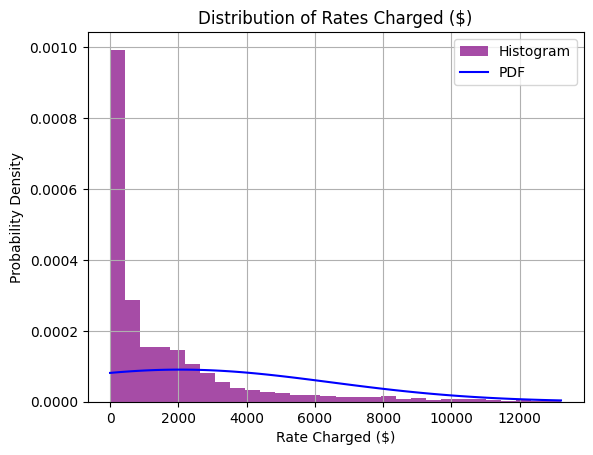

In [ ]:
# Create a histogram
plt.hist(df_cleaned['RATEcharged'], bins=30, density=True, alpha=0.7, color='purple', label='Histogram')

# Create a probability density function (PDF) curve
x = np.linspace(min(df_cleaned['RATEcharged']), max(df_cleaned['RATEcharged']),100)
pdf = (1/(std_dev * np.sqrt(2*np.pi))) * np.exp(-(x - mean)**2 / (2*std_dev**2))
plt.plot(x, pdf, color='blue', label='PDF')

plt.title('Distribution of Rates Charged ($)')
plt.xlabel('Rate Charged ($)')
plt.ylabel('Probability Density')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
df_cleaned.to_csv('/content/outliers_rem_cleaned_mount-sinai-queens_chargemaster.csv')

# Hospital Dataset 2: New York Presbyterian

## Import data Hospital 2

In [8]:
df2 = pd.read_json('/content/133957095_NewYorkPresbyterianHospital_standardcharges.json')

In [9]:
df2.shape
#6193 rows and 47 columns

(6193, 47)

In [10]:
df2.head(10)

,Code (CPT/DRG),Description,Rev Code,Inpatient/Outpatient,Gross Charges,Discounted Cash Price,Aetna,Cigna,Empire Blue Cross Blue Shield,Emblem Health,...,Consumer Health Network,Devon,Equian,First Health,Magnacare,Multiplan/Beechstreet/PHCS,QHM,Worldwide,Minimum Negotiated Charge,Maximum Negotiated Charge
0,96360,HC IV INFUSION HYDRATION INITIAL 31 MIN-1HR,0260,Inpatient/Outpatient,866.0,866.0,641.706,494.486,640.84,1388.424,...,393.5104,393.5104,393.5104,393.5104,393.5104,393.5104,393.5104,393.5104,253.04825,1388.424000
1,96361,HC IV INFUSION HYDRATION FLUIDS ADDL HR,0260,Inpatient/Outpatient,358.0,358.0,265.278,204.418,264.92,1305.112,...,162.6752,162.6752,162.6752,162.6752,162.6752,162.6752,162.6752,162.6752,51.90325,1990.891341
2,96365,HC IV INFUSION FOR THER/PROPH/DIAG INITIAL UP ...,0260,Inpatient/Outpatient,1397.0,1397.0,1035.177,797.687,1033.78,1475.508,...,634.7968,634.7968,634.7968,634.7968,634.7968,634.7968,634.7968,634.7968,253.04825,1475.508000
3,96367,HC IV INF THER/PROPH/DIAG ADDL SEQ NEW DRUG UP...,0260,Inpatient/Outpatient,480.0,480.0,355.68,274.08,355.2,1325.12,...,218.112,218.112,218.112,218.112,218.112,218.112,218.112,218.112,82.65075,1325.120000
4,96368,HC IV INFUSION FOR THER/PROPH/DIAG CONCURRENT,0260,Inpatient/Outpatient,480.0,480.0,355.68,274.08,355.2,1325.12,...,218.112,218.112,218.112,218.112,218.112,218.112,218.112,218.112,156.98280,1325.120000
5,96369,HC NON-CHEMO SC INFUSION 1 HR,0260,Inpatient/Outpatient,780.0,780.0,577.98,445.38,577.2,1374.32,...,354.432,354.432,354.432,354.432,354.432,354.432,354.432,354.432,253.04825,1374.320000
6,96370,HC NON-CHEMO SC INFUSION EACH ADDL HR,0260,Inpatient/Outpatient,480.0,480.0,355.68,274.08,355.2,1325.12,...,218.112,218.112,218.112,218.112,218.112,218.112,218.112,218.112,51.90325,1990.891341
7,96375,HC THERAPEUTIC/PROPH/DIAG INJ IV PUSH ADDL SEQ,0260,Inpatient/Outpatient,602.0,602.0,446.082,343.742,445.48,1345.128,...,273.5488,273.5488,273.5488,273.5488,273.5488,273.5488,273.5488,273.5488,51.90325,1345.128000
8,96376,HC THERAPEUTIC/PROPH/DIAG INJ IV PUSH SAME,0260,Inpatient/Outpatient,357.0,357.0,264.537,203.847,264.18,1304.948,...,162.2208,162.2208,162.2208,162.2208,162.2208,162.2208,162.2208,162.2208,162.22080,1304.948000
9,96377,HC APPLICATION OF BODY INJECTOR,0260,Inpatient/Outpatient,510.0,510.0,377.91,291.21,377.4,1330.04,...,231.744,231.744,231.744,231.744,231.744,231.744,231.744,231.744,51.90325,1330.040000


In [11]:
df2.columns

Index(['Code (CPT/DRG)', 'Description', 'Rev Code', 'Inpatient/Outpatient',
       'Gross Charges', 'Discounted Cash Price', 'Aetna', 'Cigna',
       'Empire Blue Cross Blue Shield', 'Emblem Health', 'United Health Group',
       'Aetna Medicare', 'AgeWell Medicare', 'Emblem Medicare',
       'Empire Medicare', 'Fidelis Medicare', 'Healthfirst Medicare',
       'UHC Community Plan/United Medicare', 'VNS Medicare',
       'WellCare Medicare', '1199', 'Affinity Molina Essential',
       'Affinity Molina Medicaid/CHP', 'Amida Care Medicaid',
       'Emblem Medicaid/CHP', 'Empire Healthplus Essential',
       'Empire Healthplus Exchange', 'Empire Healthplus Medicaid/CHP',
       'Fidelis Essential/Exchange', 'Fidelis Medicaid/CHP',
       'Healthfirst Essential/Exchange', 'Healthfirst Medicaid/CHP',
       'MVP Medicaid/CHP', 'MVP Essential', 'United Community Plan Essential',
       'United Community Plan Medicaid', 'VNS Medicaid',
       'Consumer Health Network', 'Devon', 'Equian', 'Fir

## Data cleaning Hospital 2



In [12]:
# Drop empty columns
df2.dropna(how='all', axis=1, inplace=True)
print(df2)

#No empty columns dropped

     Code (CPT/DRG)                                        Description  \
0             96360        HC IV INFUSION HYDRATION INITIAL 31 MIN-1HR   
1             96361            HC IV INFUSION HYDRATION FLUIDS ADDL HR   
2             96365  HC IV INFUSION FOR THER/PROPH/DIAG INITIAL UP ...   
3             96367  HC IV INF THER/PROPH/DIAG ADDL SEQ NEW DRUG UP...   
4             96368      HC IV INFUSION FOR THER/PROPH/DIAG CONCURRENT   
...             ...                                                ...   
6188            982  EXTENSIVE O.R. PROCEDURES UNRELATED TO PRINCIP...   
6189            983  EXTENSIVE O.R. PROCEDURES UNRELATED TO PRINCIP...   
6190            987  NON-EXTENSIVE O.R. PROCEDURES UNRELATED TO PRI...   
6191            988  NON-EXTENSIVE O.R. PROCEDURES UNRELATED TO PRI...   
6192            989  NON-EXTENSIVE O.R. PROCEDURES UNRELATED TO PRI...   

      Rev Code  Inpatient/Outpatient  Gross Charges  Discounted Cash Price  \
0         0260  Inpatient/Outpati

In [13]:
# Check for missing values in a column
print(df2.isnull().sum())
# Results in only Minimum Negotiated Charge and Maximum Negotiated Charge resulting in 281 missing values each

Code (CPT/DRG)                          0
Description                             0
Rev Code                                0
Inpatient/Outpatient                    0
Gross Charges                           0
Discounted Cash Price                   0
Aetna                                   0
Cigna                                   0
Empire Blue Cross Blue Shield           0
Emblem Health                           0
United Health Group                     0
Aetna Medicare                          0
AgeWell Medicare                        0
Emblem Medicare                         0
Empire Medicare                         0
Fidelis Medicare                        0
Healthfirst Medicare                    0
UHC Community Plan/United Medicare      0
VNS Medicare                            0
WellCare Medicare                       0
1199                                    0
Affinity Molina Essential               0
Affinity Molina Medicaid/CHP            0
Amida Care Medicaid               

In [14]:
df2.drop_duplicates(inplace=True)
# No duplicate rows identified

In [15]:
#Rename columns
df2_clean=df2.rename(columns={'Code (CPT/DRG)':'CPTDRGCode', 'Inpatient/Outpatient':'Inpt_Oupt','Affinity Molina Medicaid/CHP':'Affinity_Molina_Medicaid_CHP','UHC Community Plan/United Medicare':"UHC_CommPlan_Medicare",'Emblem Medicaid/CHP':'Emblem_Medicaid_CHP','Empire Medicaid/CHP':'Empire_medicaid_CHP','Empire Healthplus Medicaid/CHP':'Empire_Healthplus_MedicaidCHP','Fidelis Essential/Exchange':'Fidelis_Essential_Exchange','Fidelis Medicaid/CHP':'Fidelis_Medicaid_CHP','Healthfirst Essential/Exchange':'Healthfirst_Essential_Exchange','Healthfirst Medicaid/CHP':'Healthfirst_Medicaid_CHP','MVP Medicaid/CHP':'MVP_Medicaid_CHP','Multiplan/Beechstreet/PHCS':'Multiplan_Beechstreet_PHCS'})

#### Identify and convert strings to floats for Insurance Company pricing



In [115]:
#Identify strings that need to be converted to floats, and run this command to confirm conversion
df2_clean.dtypes

CPTDRGCode                          object
Description                         object
Rev Code                            object
Inpt_Oupt                           object
Gross Charges                      float64
Discounted Cash Price              float64
Aetna                              float64
Cigna                              float64
Empire Blue Cross Blue Shield      float64
Emblem Health                      float64
United Health Group                float64
Aetna Medicare                     float64
AgeWell Medicare                   float64
Emblem Medicare                    float64
Empire Medicare                    float64
Fidelis Medicare                   float64
Healthfirst Medicare               float64
UHC_CommPlan_Medicare              float64
VNS Medicare                       float64
WellCare Medicare                  float64
1199                               float64
Affinity Molina Essential          float64
Affinity_Molina_Medicaid_CHP       float64
Amida Care 

In [20]:
for x in df2_clean.index:
  if df2_clean.loc[x, "Aetna"] == 'Not separately payable' or df2_clean.loc[x, "Aetna"] == 'Included in Service Package' or df2_clean.loc[x, "Aetna"] == 'Patient responsibility':
    df2_clean.drop(x, inplace = True)

In [21]:
df2_clean['Aetna'] = df2_clean['Aetna'].apply(float)

In [25]:
for x in df2_clean.index:
  if df2_clean.loc[x, "Cigna"] == 'Not separately payable' or df2_clean.loc[x, "Cigna"] == 'Included in Service Package' or df2_clean.loc[x, "Cigna"] == 'Patient responsibility':
    df2_clean.drop(x, inplace = True)

In [26]:
df2_clean['Cigna'] = df2_clean['Cigna'].apply(float)

In [34]:
for x in df2_clean.index:
  if df2_clean.loc[x, "Empire Blue Cross Blue Shield"] == 'Not separately payable' or df2_clean.loc[x, "Empire Blue Cross Blue Shield"] == 'Included in Service Package' or df2_clean.loc[x, "Empire Blue Cross Blue Shield"] == 'Patient responsibility':
    df2_clean.drop(x, inplace = True)

In [35]:
df2_clean['Empire Blue Cross Blue Shield'] = df2_clean['Empire Blue Cross Blue Shield'].apply(float)

In [37]:
for x in df2_clean.index:
  if df2_clean.loc[x, "Emblem Health"] == 'Not separately payable' or df2_clean.loc[x, "Emblem Health"] == 'Included in Service Package' or df2_clean.loc[x, "Emblem Health"] == 'Patient responsibility':
    df2_clean.drop(x, inplace = True)

In [38]:
df2_clean['Emblem Health'] = df2_clean['Emblem Health'].apply(float)

In [39]:
for x in df2_clean.index:
  if df2_clean.loc[x, "United Health Group"] == 'Not separately payable' or df2_clean.loc[x, "United Health Group"] == 'Included in Service Package' or df2_clean.loc[x, "United Health Group"] == 'Patient responsibility':
    df2_clean.drop(x, inplace = True)

In [40]:
df2_clean['United Health Group'] = df2_clean['United Health Group'].apply(float)

In [41]:
for x in df2_clean.index:
  if df2_clean.loc[x, "Aetna Medicare"] == 'Not separately payable' or df2_clean.loc[x, "Aetna Medicare"] == 'Included in Service Package' or df2_clean.loc[x, "Aetna Medicare"] == 'Patient responsibility':
    df2_clean.drop(x, inplace = True)

In [42]:
df2_clean['Aetna Medicare'] = df2_clean['Aetna Medicare'].apply(float)

In [43]:
for x in df2_clean.index:
  if df2_clean.loc[x, "AgeWell Medicare"] == 'Not separately payable' or df2_clean.loc[x, "AgeWell Medicare"] == 'Included in Service Package' or df2_clean.loc[x, "AgeWell Medicare"] == 'Patient responsibility':
    df2_clean.drop(x, inplace = True)

In [44]:
df2_clean['AgeWell Medicare'] = df2_clean['AgeWell Medicare'].apply(float)

In [45]:
for x in df2_clean.index:
  if df2_clean.loc[x, "Emblem Medicare"] == 'Not separately payable' or df2_clean.loc[x, "Emblem Medicare"] == 'Included in Service Package' or df2_clean.loc[x, "Emblem Medicare"] == 'Patient responsibility':
    df2_clean.drop(x, inplace = True)

In [46]:
df2_clean['Emblem Medicare'] = df2_clean['Emblem Medicare'].apply(float)

In [47]:
for x in df2_clean.index:
  if df2_clean.loc[x, "Empire Medicare"] == 'Not separately payable' or df2_clean.loc[x, "Empire Medicare"] == 'Included in Service Package' or df2_clean.loc[x, "Empire Medicare"] == 'Patient responsibility':
    df2_clean.drop(x, inplace = True)

In [48]:
df2_clean['Empire Medicare'] = df2_clean['Empire Medicare'].apply(float)

In [49]:
for x in df2_clean.index:
  if df2_clean.loc[x, "Fidelis Medicare"] == 'Not separately payable' or df2_clean.loc[x, "Fidelis Medicare"] == 'Included in Service Package' or df2_clean.loc[x, "Fidelis Medicare"] == 'Patient responsibility':
    df2_clean.drop(x, inplace = True)

In [50]:
df2_clean['Fidelis Medicare'] = df2_clean['Fidelis Medicare'].apply(float)

In [51]:
for x in df2_clean.index:
  if df2_clean.loc[x, "Healthfirst Medicare"] == 'Not separately payable' or df2_clean.loc[x, "Healthfirst Medicare"] == 'Included in Service Package' or df2_clean.loc[x, "Healthfirst Medicare"] == 'Patient responsibility':
    df2_clean.drop(x, inplace = True)

In [52]:
df2_clean['Healthfirst Medicare'] = df2_clean['Healthfirst Medicare'].apply(float)

In [53]:
for x in df2_clean.index:
  if df2_clean.loc[x, "UHC_CommPlan_Medicare"] == 'Not separately payable' or df2_clean.loc[x, "UHC_CommPlan_Medicare"] == 'Included in Service Package' or df2_clean.loc[x, "UHC_CommPlan_Medicare"] == 'Patient responsibility':
    df2_clean.drop(x, inplace = True)

In [54]:
df2_clean['UHC_CommPlan_Medicare'] = df2_clean['UHC_CommPlan_Medicare'].apply(float)

In [55]:
for x in df2_clean.index:
  if df2_clean.loc[x, "VNS Medicare"] == 'Not separately payable' or df2_clean.loc[x, "VNS Medicare"] == 'Included in Service Package' or df2_clean.loc[x, "VNS Medicare"] == 'Patient responsibility':
    df2_clean.drop(x, inplace = True)

In [56]:
df2_clean['VNS Medicare'] = df2_clean['VNS Medicare'].apply(float)

In [57]:
for x in df2_clean.index:
  if df2_clean.loc[x, "WellCare Medicare"] == 'Not separately payable' or df2_clean.loc[x, "WellCare Medicare"] == 'Included in Service Package' or df2_clean.loc[x, "WellCare Medicare"] == 'Patient responsibility':
    df2_clean.drop(x, inplace = True)

In [114]:
df2_clean['WellCare Medicare'] = df2_clean['WellCare Medicare'].apply(float)

In [58]:
for x in df2_clean.index:
  if df2_clean.loc[x, "1199"] == 'Not separately payable' or df2_clean.loc[x, "1199"] == 'Included in Service Package' or df2_clean.loc[x, "1199"] == 'Patient responsibility':
    df2_clean.drop(x, inplace = True)

In [59]:
df2_clean['1199'] = df2_clean['1199'].apply(float)

In [63]:
for x in df2_clean.index:
  if df2_clean.loc[x, "Affinity Molina Essential"] == 'Not separately payable' or df2_clean.loc[x, "Affinity Molina Essential"] == 'Included in Service Package' or df2_clean.loc[x, "Affinity Molina Essential"] == 'Patient responsibility' or df2_clean.loc[x,"Affinity Molina Essential"] == 'See Tab A':
    df2_clean.drop(x, inplace = True)

In [64]:
df2_clean['Affinity Molina Essential'] = df2_clean['Affinity Molina Essential'].apply(float)

In [66]:
for x in df2_clean.index:
  if df2_clean.loc[x, "Affinity_Molina_Medicaid_CHP"] == 'Not separately payable' or df2_clean.loc[x, "Affinity_Molina_Medicaid_CHP"] == 'Included in Service Package' or df2_clean.loc[x, "Affinity_Molina_Medicaid_CHP"] == 'Patient responsibility':
    df2_clean.drop(x, inplace = True)

In [67]:
df2_clean['Affinity_Molina_Medicaid_CHP'] = df2_clean['Affinity_Molina_Medicaid_CHP'].apply(float)

In [68]:
for x in df2_clean.index:
  if df2_clean.loc[x, "Amida Care Medicaid"] == 'Not separately payable' or df2_clean.loc[x, "Amida Care Medicaid"] == 'Included in Service Package' or df2_clean.loc[x, "Amida Care Medicaid"] == 'Patient responsibility':
    df2_clean.drop(x, inplace = True)

In [69]:
df2_clean['Amida Care Medicaid'] = df2_clean['Amida Care Medicaid'].apply(float)

In [70]:
for x in df2_clean.index:
  if df2_clean.loc[x, "Emblem_Medicaid_CHP"] == 'Not separately payable' or df2_clean.loc[x, "Emblem_Medicaid_CHP"] == 'Included in Service Package' or df2_clean.loc[x, "Emblem_Medicaid_CHP"] == 'Patient responsibility':
    df2_clean.drop(x, inplace = True)

In [71]:
df2_clean['Emblem_Medicaid_CHP'] = df2_clean['Emblem_Medicaid_CHP'].apply(float)

In [72]:
for x in df2_clean.index:
  if df2_clean.loc[x, "Empire Healthplus Essential"] == 'Not separately payable' or df2_clean.loc[x, "Empire Healthplus Essential"] == 'Included in Service Package' or df2_clean.loc[x, "Empire Healthplus Essential"] == 'Patient responsibility':
    df2_clean.drop(x, inplace = True)

In [73]:
df2_clean['Empire Healthplus Essential'] = df2_clean['Empire Healthplus Essential'].apply(float)

In [74]:
for x in df2_clean.index:
  if df2_clean.loc[x, "Empire Healthplus Exchange"] == 'Not separately payable' or df2_clean.loc[x, "Empire Healthplus Exchange"] == 'Included in Service Package' or df2_clean.loc[x, "Empire Healthplus Exchange"] == 'Patient responsibility':
    df2_clean.drop(x, inplace = True)

In [75]:
df2_clean['Empire Healthplus Exchange'] = df2_clean['Empire Healthplus Exchange'].apply(float)

In [76]:
for x in df2_clean.index:
  if df2_clean.loc[x, "Empire_Healthplus_MedicaidCHP"] == 'Not separately payable' or df2_clean.loc[x, "Empire_Healthplus_MedicaidCHP"] == 'Included in Service Package' or df2_clean.loc[x, "Empire_Healthplus_MedicaidCHP"] == 'Patient responsibility':
    df2_clean.drop(x, inplace = True)

In [77]:
df2_clean['Empire_Healthplus_MedicaidCHP'] = df2_clean['Empire_Healthplus_MedicaidCHP'].apply(float)

In [78]:
for x in df2_clean.index:
  if df2_clean.loc[x, "Fidelis_Essential_Exchange"] == 'Not separately payable' or df2_clean.loc[x, "Fidelis_Essential_Exchange"] == 'Included in Service Package' or df2_clean.loc[x, "Fidelis_Essential_Exchange"] == 'Patient responsibility':
    df2_clean.drop(x, inplace = True)

In [79]:
df2_clean['Fidelis_Essential_Exchange'] = df2_clean['Fidelis_Essential_Exchange'].apply(float)

In [80]:
for x in df2_clean.index:
  if df2_clean.loc[x, "Fidelis_Medicaid_CHP"] == 'Not separately payable' or df2_clean.loc[x, "Fidelis_Medicaid_CHP"] == 'Included in Service Package' or df2_clean.loc[x, "Fidelis_Medicaid_CHP"] == 'Patient responsibility':
    df2_clean.drop(x, inplace = True)

In [81]:
df2_clean['Fidelis_Medicaid_CHP'] = df2_clean['Fidelis_Medicaid_CHP'].apply(float)

In [82]:
for x in df2_clean.index:
  if df2_clean.loc[x, "Healthfirst_Essential_Exchange"] == 'Not separately payable' or df2_clean.loc[x, "Healthfirst_Essential_Exchange"] == 'Included in Service Package' or df2_clean.loc[x, "Healthfirst_Essential_Exchange"] == 'Patient responsibility':
    df2_clean.drop(x, inplace = True)

In [83]:
df2_clean['Healthfirst_Essential_Exchange'] = df2_clean['Healthfirst_Essential_Exchange'].apply(float)

In [84]:
for x in df2_clean.index:
  if df2_clean.loc[x, "Healthfirst_Medicaid_CHP"] == 'Not separately payable' or df2_clean.loc[x, "Healthfirst_Medicaid_CHP"] == 'Included in Service Package' or df2_clean.loc[x, "Healthfirst_Medicaid_CHP"] == 'Patient responsibility':
    df2_clean.drop(x, inplace = True)

In [85]:
df2_clean['Healthfirst_Medicaid_CHP'] = df2_clean['Healthfirst_Medicaid_CHP'].apply(float)

In [86]:
for x in df2_clean.index:
  if df2_clean.loc[x, "MVP_Medicaid_CHP"] == 'Not separately payable' or df2_clean.loc[x, "MVP_Medicaid_CHP"] == 'Included in Service Package' or df2_clean.loc[x, "MVP_Medicaid_CHP"] == 'Patient responsibility':
    df2_clean.drop(x, inplace = True)

In [87]:
df2_clean['MVP_Medicaid_CHP'] = df2_clean['MVP_Medicaid_CHP'].apply(float)

In [88]:
for x in df2_clean.index:
  if df2_clean.loc[x, "MVP Essential"] == 'Not separately payable' or df2_clean.loc[x, "MVP Essential"] == 'Included in Service Package' or df2_clean.loc[x, "MVP Essential"] == 'Patient responsibility':
    df2_clean.drop(x, inplace = True)

In [89]:
df2_clean['MVP Essential'] = df2_clean['MVP Essential'].apply(float)

In [90]:
for x in df2_clean.index:
  if df2_clean.loc[x, "United Community Plan Essential"] == 'Not separately payable' or df2_clean.loc[x, "United Community Plan Essential"] == 'Included in Service Package' or df2_clean.loc[x, "United Community Plan Essential"] == 'Patient responsibility':
    df2_clean.drop(x, inplace = True)

In [91]:
df2_clean['United Community Plan Essential'] = df2_clean['United Community Plan Essential'].apply(float)

In [92]:
for x in df2_clean.index:
  if df2_clean.loc[x, "United Community Plan Medicaid"] == 'Not separately payable' or df2_clean.loc[x, "United Community Plan Medicaid"] == 'Included in Service Package' or df2_clean.loc[x, "United Community Plan Medicaid"] == 'Patient responsibility':
    df2_clean.drop(x, inplace = True)

In [93]:
df2_clean['United Community Plan Medicaid'] = df2_clean['United Community Plan Medicaid'].apply(float)

In [94]:
for x in df2_clean.index:
  if df2_clean.loc[x, "VNS Medicaid"] == 'Not separately payable' or df2_clean.loc[x, "VNS Medicaid"] == 'Included in Service Package' or df2_clean.loc[x, "VNS Medicaid"] == 'Patient responsibility':
    df2_clean.drop(x, inplace = True)

In [95]:
df2_clean['VNS Medicaid'] = df2_clean['VNS Medicaid'].apply(float)

In [96]:
for x in df2_clean.index:
  if df2_clean.loc[x, "Consumer Health Network"] == 'Not separately payable' or df2_clean.loc[x, "Consumer Health Network"] == 'Included in Service Package' or df2_clean.loc[x, "Consumer Health Network"] == 'Patient responsibility':
    df2_clean.drop(x, inplace = True)

In [97]:
df2_clean['Consumer Health Network'] = df2_clean['Consumer Health Network'].apply(float)

In [98]:
for x in df2_clean.index:
  if df2_clean.loc[x, "Devon"] == 'Not separately payable' or df2_clean.loc[x, "Devon"] == 'Included in Service Package' or df2_clean.loc[x, "Devon"] == 'Patient responsibility':
    df2_clean.drop(x, inplace = True)

In [99]:
df2_clean['Devon'] = df2_clean['Devon'].apply(float)

In [100]:
for x in df2_clean.index:
  if df2_clean.loc[x, "Equian"] == 'Not separately payable' or df2_clean.loc[x, "Equian"] == 'Included in Service Package' or df2_clean.loc[x, "Equian"] == 'Patient responsibility':
    df2_clean.drop(x, inplace = True)

In [101]:
df2_clean['Equian'] = df2_clean['Equian'].apply(float)

In [102]:
for x in df2_clean.index:
  if df2_clean.loc[x, "First Health"] == 'Not separately payable' or df2_clean.loc[x, "First Health"] == 'Included in Service Package' or df2_clean.loc[x, "First Health"] == 'Patient responsibility':
    df2_clean.drop(x, inplace = True)

In [103]:
df2_clean['First Health'] = df2_clean['First Health'].apply(float)

In [104]:
for x in df2_clean.index:
  if df2_clean.loc[x, "Magnacare"] == 'Not separately payable' or df2_clean.loc[x, "Magnacare"] == 'Included in Service Package' or df2_clean.loc[x, "Magnacare"] == 'Patient responsibility':
    df2_clean.drop(x, inplace = True)

In [105]:
df2_clean['Magnacare'] = df2_clean['Magnacare'].apply(float)

In [106]:
for x in df2_clean.index:
  if df2_clean.loc[x, "Multiplan_Beechstreet_PHCS"] == 'Not separately payable' or df2_clean.loc[x, "Multiplan_Beechstreet_PHCS"] == 'Included in Service Package' or df2_clean.loc[x, "Multiplan_Beechstreet_PHCS"] == 'Patient responsibility':
    df2_clean.drop(x, inplace = True)

In [107]:
df2_clean['Multiplan_Beechstreet_PHCS'] = df2_clean['Multiplan_Beechstreet_PHCS'].apply(float)

In [108]:
for x in df2_clean.index:
  if df2_clean.loc[x, "QHM"] == 'Not separately payable' or df2_clean.loc[x, "QHM"] == 'Included in Service Package' or df2_clean.loc[x, "QHM"] == 'Patient responsibility':
    df2_clean.drop(x, inplace = True)

In [109]:
df2_clean['QHM'] = df2_clean['QHM'].apply(float)

In [110]:
for x in df2_clean.index:
  if df2_clean.loc[x, "Worldwide"] == 'Not separately payable' or df2_clean.loc[x, "Worldwide"] == 'Included in Service Package' or df2_clean.loc[x, "Worldwide"] == 'Patient responsibility':
    df2_clean.drop(x, inplace = True)

In [111]:
df2_clean['Worldwide'] = df2_clean['Worldwide'].apply(float)

## Exploratory Analysis Hospital 2



#### Observations:

Very few missing values

The majority of charge code prices for insurance companies were loaded as strings and needed to be converted to float

The presence of outliers skewed the data; removed all outliers greater than 3 standard deviations for the graphs

Data is heavily skewed to the right

Variance between data values is very high (in the thousands)

In [122]:
df2_clean.to_csv('/content/newdb_NewYorkPresbyterianHospital_standardcharges.csv')

In [112]:
df2_clean.describe()

,Gross Charges,Discounted Cash Price,Aetna,Cigna,Empire Blue Cross Blue Shield,Emblem Health,United Health Group,Aetna Medicare,AgeWell Medicare,Emblem Medicare,...,Consumer Health Network,Devon,Equian,First Health,Magnacare,Multiplan_Beechstreet_PHCS,QHM,Worldwide,Minimum Negotiated Charge,Maximum Negotiated Charge
count,3.953000e+03,3.953000e+03,3.953000e+03,3.953000e+03,3.953000e+03,3.953000e+03,3.953000e+03,3953.000000,3953.000000,3953.000000,...,3.953000e+03,3.953000e+03,3.953000e+03,3.953000e+03,3.953000e+03,3.953000e+03,3.953000e+03,3.953000e+03,3953.000000,3.953000e+03
mean,4.699778e+04,4.699778e+04,1.926944e+04,1.996704e+04,2.656232e+04,2.507008e+04,2.091419e+04,6233.779425,7790.569565,6246.638656,...,2.135579e+04,2.135579e+04,2.135579e+04,2.135579e+04,2.135579e+04,2.135579e+04,2.135579e+04,2.135579e+04,3083.751046,3.329255e+04
std,1.159730e+05,1.159730e+05,4.773265e+04,5.331035e+04,7.605949e+04,7.123049e+04,5.876413e+04,13122.910977,16403.682377,13143.105162,...,5.269815e+04,5.269815e+04,5.269815e+04,5.269815e+04,5.269815e+04,5.269815e+04,5.269815e+04,5.269815e+04,7150.731559,8.535069e+04
min,2.100000e+01,2.100000e+01,1.575000e+00,1.365000e+00,1.575000e+00,1.575000e+00,3.600000e+00,2.250000,2.812500,2.250000,...,9.542400e+00,9.542400e+00,9.542400e+00,9.542400e+00,9.542400e+00,9.542400e+00,9.542400e+00,9.542400e+00,1.365000,1.422000e+02
25%,8.930000e+02,8.930000e+02,5.809440e+02,3.745760e+02,5.365206e+02,4.679280e+02,2.817900e+02,142.234750,177.793438,142.234750,...,4.057792e+02,4.057792e+02,4.057792e+02,4.057792e+02,4.057792e+02,4.057792e+02,4.057792e+02,4.057792e+02,130.928000,8.803800e+02
50%,2.126000e+04,2.126000e+04,9.144000e+03,7.496000e+03,1.192400e+04,9.474400e+03,5.445000e+03,2133.447750,2666.809688,2133.447750,...,9.660544e+03,9.660544e+03,9.660544e+03,9.660544e+03,9.660544e+03,9.660544e+03,9.660544e+03,9.660544e+03,1135.400400,1.305900e+04
75%,4.297300e+04,4.297300e+04,9.144000e+03,7.496000e+03,1.541400e+04,9.474400e+03,9.670000e+03,7280.358750,9100.448437,7280.358750,...,1.952693e+04,1.952693e+04,1.952693e+04,1.952693e+04,1.952693e+04,1.952693e+04,1.952693e+04,1.952693e+04,2571.898415,2.728500e+04
max,2.538980e+06,2.538980e+06,1.249756e+06,1.425398e+06,1.698874e+06,1.713460e+06,1.483291e+06,334941.744704,418677.180880,334941.744704,...,1.153712e+06,1.153712e+06,1.153712e+06,1.153712e+06,1.153712e+06,1.153712e+06,1.153712e+06,1.153712e+06,204861.126000,1.713460e+06


In [120]:
# Data distribution

# Calculate mean, median, and mode
mean2= df2_clean[['Gross Charges','Discounted Cash Price','Minimum Negotiated Charge', 'Maximum Negotiated Charge','Aetna','Cigna','Empire Blue Cross Blue Shield','Emblem Health','United Health Group','Aetna Medicare','AgeWell Medicare','Emblem Medicare','Empire Medicare','Fidelis Medicare','Healthfirst Medicare','UHC_CommPlan_Medicare','VNS Medicare','WellCare Medicare','1199','Affinity Molina Essential','Affinity_Molina_Medicaid_CHP','Amida Care Medicaid','Emblem_Medicaid_CHP','Empire Healthplus Essential','Empire Healthplus Exchange','Empire_Healthplus_MedicaidCHP','Fidelis_Essential_Exchange','Fidelis_Medicaid_CHP','Healthfirst_Essential_Exchange','Healthfirst_Medicaid_CHP','MVP_Medicaid_CHP','MVP Essential','United Community Plan Essential','United Community Plan Medicaid','VNS Medicaid','Consumer Health Network','Devon','Equian','First Health', 'Magnacare','Multiplan_Beechstreet_PHCS','QHM','Worldwide']].mean()
median2 = df2_clean[['Gross Charges','Discounted Cash Price','Minimum Negotiated Charge', 'Maximum Negotiated Charge','Aetna','Cigna','Empire Blue Cross Blue Shield','Emblem Health','United Health Group','Aetna Medicare','AgeWell Medicare','Emblem Medicare','Empire Medicare','Fidelis Medicare','Healthfirst Medicare','UHC_CommPlan_Medicare','VNS Medicare','WellCare Medicare','1199','Affinity Molina Essential','Affinity_Molina_Medicaid_CHP','Amida Care Medicaid','Emblem_Medicaid_CHP','Empire Healthplus Essential','Empire Healthplus Exchange','Empire_Healthplus_MedicaidCHP','Fidelis_Essential_Exchange','Fidelis_Medicaid_CHP','Healthfirst_Essential_Exchange','Healthfirst_Medicaid_CHP','MVP_Medicaid_CHP','MVP Essential','United Community Plan Essential','United Community Plan Medicaid','VNS Medicaid','Consumer Health Network','Devon','Equian','First Health', 'Magnacare','Multiplan_Beechstreet_PHCS','QHM','Worldwide']].median()
mode2 = df2_clean[['Gross Charges','Discounted Cash Price','Minimum Negotiated Charge', 'Maximum Negotiated Charge','Aetna','Cigna','Empire Blue Cross Blue Shield','Emblem Health','United Health Group','Aetna Medicare','AgeWell Medicare','Emblem Medicare','Empire Medicare','Fidelis Medicare','Healthfirst Medicare','UHC_CommPlan_Medicare','VNS Medicare','WellCare Medicare','1199','Affinity Molina Essential','Affinity_Molina_Medicaid_CHP','Amida Care Medicaid','Emblem_Medicaid_CHP','Empire Healthplus Essential','Empire Healthplus Exchange','Empire_Healthplus_MedicaidCHP','Fidelis_Essential_Exchange','Fidelis_Medicaid_CHP','Healthfirst_Essential_Exchange','Healthfirst_Medicaid_CHP','MVP_Medicaid_CHP','MVP Essential','United Community Plan Essential','United Community Plan Medicaid','VNS Medicaid','Consumer Health Network','Devon','Equian','First Health', 'Magnacare','Multiplan_Beechstreet_PHCS','QHM','Worldwide']].mode().iloc[0]
print("Mean is:\n", mean2, '\n')
print("Median is:\n", median2, '\n')
print("Mode is:\n ", mode2, '\n')
# Calculate range
range2 = df2_clean[['Gross Charges','Discounted Cash Price','Minimum Negotiated Charge', 'Maximum Negotiated Charge','Aetna','Cigna','Empire Blue Cross Blue Shield','Emblem Health','United Health Group','Aetna Medicare','AgeWell Medicare','Emblem Medicare','Empire Medicare','Fidelis Medicare','Healthfirst Medicare','UHC_CommPlan_Medicare','VNS Medicare','WellCare Medicare','1199','Affinity Molina Essential','Affinity_Molina_Medicaid_CHP','Amida Care Medicaid','Emblem_Medicaid_CHP','Empire Healthplus Essential','Empire Healthplus Exchange','Empire_Healthplus_MedicaidCHP','Fidelis_Essential_Exchange','Fidelis_Medicaid_CHP','Healthfirst_Essential_Exchange','Healthfirst_Medicaid_CHP','MVP_Medicaid_CHP','MVP Essential','United Community Plan Essential','United Community Plan Medicaid','VNS Medicaid','Consumer Health Network','Devon','Equian','First Health', 'Magnacare','Multiplan_Beechstreet_PHCS','QHM','Worldwide']].max() - df2_clean[['Gross Charges','Discounted Cash Price','Minimum Negotiated Charge', 'Maximum Negotiated Charge','Aetna','Cigna','Empire Blue Cross Blue Shield','Emblem Health','United Health Group','Aetna Medicare','AgeWell Medicare','Emblem Medicare','Empire Medicare','Fidelis Medicare','Healthfirst Medicare','UHC_CommPlan_Medicare','VNS Medicare','WellCare Medicare','1199','Affinity Molina Essential','Affinity_Molina_Medicaid_CHP','Amida Care Medicaid','Emblem_Medicaid_CHP','Empire Healthplus Essential','Empire Healthplus Exchange','Empire_Healthplus_MedicaidCHP','Fidelis_Essential_Exchange','Fidelis_Medicaid_CHP','Healthfirst_Essential_Exchange','Healthfirst_Medicaid_CHP','MVP_Medicaid_CHP','MVP Essential','United Community Plan Essential','United Community Plan Medicaid','VNS Medicaid','Consumer Health Network','Devon','Equian','First Health', 'Magnacare','Multiplan_Beechstreet_PHCS','QHM','Worldwide']].min()
print("Range is:\n", range2, '\n')
# Calculate variance and standard deviation
variance2 = np.var(df2_clean[['Gross Charges','Discounted Cash Price','Minimum Negotiated Charge', 'Maximum Negotiated Charge','Aetna','Cigna','Empire Blue Cross Blue Shield','Emblem Health','United Health Group','Aetna Medicare','AgeWell Medicare','Emblem Medicare','Empire Medicare','Fidelis Medicare','Healthfirst Medicare','UHC_CommPlan_Medicare','VNS Medicare','WellCare Medicare','1199','Affinity Molina Essential','Affinity_Molina_Medicaid_CHP','Amida Care Medicaid','Emblem_Medicaid_CHP','Empire Healthplus Essential','Empire Healthplus Exchange','Empire_Healthplus_MedicaidCHP','Fidelis_Essential_Exchange','Fidelis_Medicaid_CHP','Healthfirst_Essential_Exchange','Healthfirst_Medicaid_CHP','MVP_Medicaid_CHP','MVP Essential','United Community Plan Essential','United Community Plan Medicaid','VNS Medicaid','Consumer Health Network','Devon','Equian','First Health', 'Magnacare','Multiplan_Beechstreet_PHCS','QHM','Worldwide']])
print("Variance is:\n",variance2, '\n')
std_dev2 = np.std(df2_clean[['Gross Charges','Discounted Cash Price','Minimum Negotiated Charge', 'Maximum Negotiated Charge','Aetna','Cigna','Empire Blue Cross Blue Shield','Emblem Health','United Health Group','Aetna Medicare','AgeWell Medicare','Emblem Medicare','Empire Medicare','Fidelis Medicare','Healthfirst Medicare','UHC_CommPlan_Medicare','VNS Medicare','WellCare Medicare','1199','Affinity Molina Essential','Affinity_Molina_Medicaid_CHP','Amida Care Medicaid','Emblem_Medicaid_CHP','Empire Healthplus Essential','Empire Healthplus Exchange','Empire_Healthplus_MedicaidCHP','Fidelis_Essential_Exchange','Fidelis_Medicaid_CHP','Healthfirst_Essential_Exchange','Healthfirst_Medicaid_CHP','MVP_Medicaid_CHP','MVP Essential','United Community Plan Essential','United Community Plan Medicaid','VNS Medicaid','Consumer Health Network','Devon','Equian','First Health', 'Magnacare','Multiplan_Beechstreet_PHCS','QHM','Worldwide']])
print("Standard Deviation is:\n", std_dev2)

Mean is:
 Gross Charges                      46997.780489
Discounted Cash Price              46997.780489
Minimum Negotiated Charge           3083.751046
Maximum Negotiated Charge          33292.549226
Aetna                              19269.438005
Cigna                              19967.040150
Empire Blue Cross Blue Shield      26562.318413
Emblem Health                      25070.083919
United Health Group                20914.191400
Aetna Medicare                      6233.779425
AgeWell Medicare                    7790.569565
Emblem Medicare                     6246.638656
Empire Medicare                     6248.502476
Fidelis Medicare                    6361.668202
Healthfirst Medicare                6420.594242
UHC_CommPlan_Medicare               7642.978928
VNS Medicare                        6466.359382
WellCare Medicare                   6451.730045
1199                                8580.817309
Affinity Molina Essential          12429.147795
Affinity_Molina_Medicaid_CHP  

In [137]:
# Remove outliers by only allowing data within 3 standard deviations to display in the graph
df2_clean_outliers = df2_clean[df2_clean[['Gross Charges','Discounted Cash Price','Minimum Negotiated Charge', 'Maximum Negotiated Charge','Aetna','Cigna','Empire Blue Cross Blue Shield','Emblem Health','United Health Group','Aetna Medicare','AgeWell Medicare','Emblem Medicare','Empire Medicare','Fidelis Medicare','Healthfirst Medicare','UHC_CommPlan_Medicare','VNS Medicare','WellCare Medicare','1199','Affinity Molina Essential','Affinity_Molina_Medicaid_CHP','Amida Care Medicaid','Emblem_Medicaid_CHP','Empire Healthplus Essential','Empire Healthplus Exchange','Empire_Healthplus_MedicaidCHP','Fidelis_Essential_Exchange','Fidelis_Medicaid_CHP','Healthfirst_Essential_Exchange','Healthfirst_Medicaid_CHP','MVP_Medicaid_CHP','MVP Essential','United Community Plan Essential','United Community Plan Medicaid','VNS Medicaid','Consumer Health Network','Devon','Equian','First Health', 'Magnacare','Multiplan_Beechstreet_PHCS','QHM','Worldwide']]<= std_dev2*3]

Gross Charges Histogram


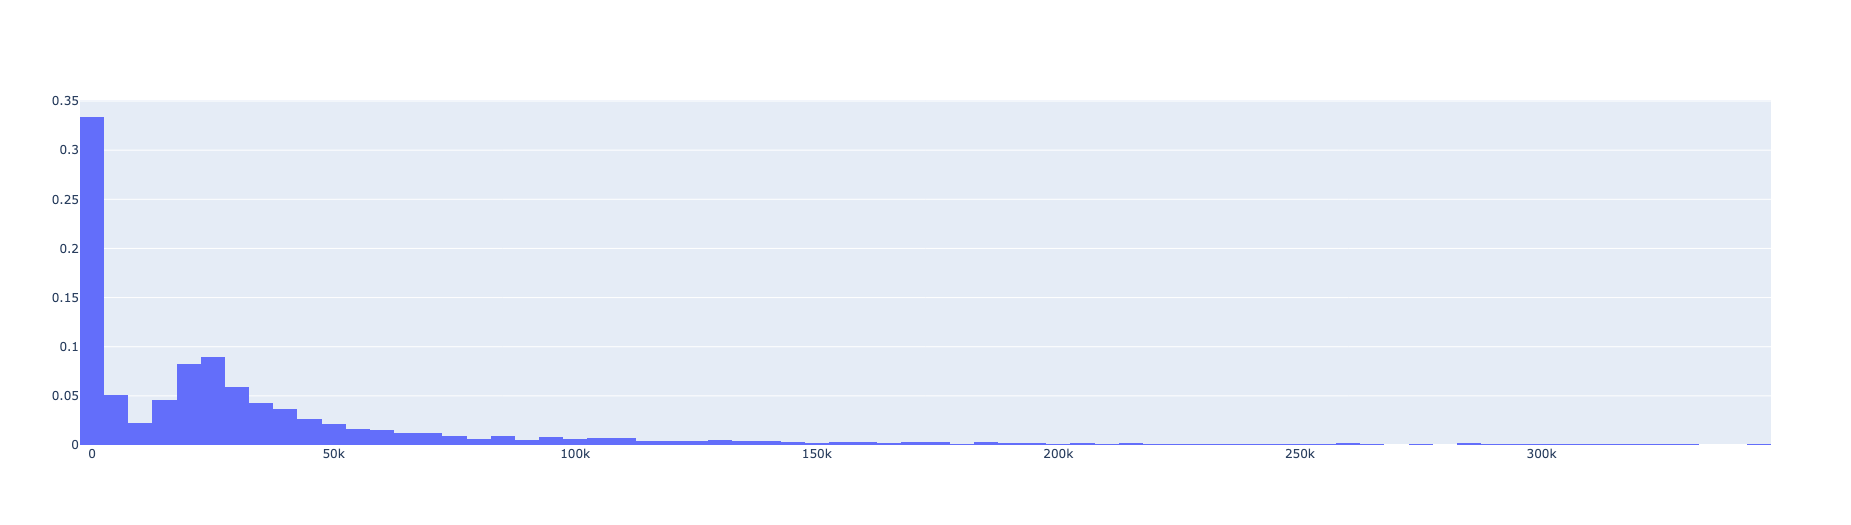

In [135]:
fig1 = go.Figure(data=[go.Histogram(x=df2_clean_outliers['Gross Charges'], histnorm='probability')])
print('Gross Charges Histogram')

display.Image("/content/newplot (4).png")

In [71]:
df2_clean['CPTDRGCode'].value_counts()

96360    1
D0705    1
D0431    1
D0425    1
D0423    1
        ..
29874    1
29873    1
29871    1
29870    1
989      1
Name: CPTDRGCode, Length: 6193, dtype: int64

In [72]:
df2_clean['Description'].value_counts()

KNEE ARTHROSCOPY/SURGERY                                                         16
REPAIR EYELID DEFECT                                                             12
CYSTOSCOPY AND TREATMENT                                                         12
TREAT HUMERUS FRACTURE                                                            9
SHOULDER ARTHROSCOPY/SURGERY                                                      7
                                                                                 ..
AMPUTATION TOE METATARSAL                                                         1
AMPUTATION THRU METATARSAL                                                        1
AMPUTATION OF MIDFOOT                                                             1
REVISION OF FOOT BONES                                                            1
NON-EXTENSIVE O.R. PROCEDURES UNRELATED TO PRINCIPAL DIAGNOSIS WITHOUT CC/MCC     1
Name: Description, Length: 5925, dtype: int64

In [73]:
df2_clean['Rev Code'].value_counts()

0360        1955
0512         737
Multiple     723
0510         421
0301         341
            ... 
0770           1
0204           1
0616           1
0110           1
0801           1
Name: Rev Code, Length: 150, dtype: int64

In [74]:
df2_clean['Inpt_Oupt'].value_counts()

Inpatient/Outpatient    5470
Inpatient                723
Name: Inpt_Oupt, dtype: int64

# SQLite Database Operations

In [135]:
conn = sqlite3.connect('health.db')
c = conn.cursor()

### Manual table creation

In [ ]:
c.execute('''
              CREATE TABLE msqCharges7
                    (
                      Charge_description text,
                      Department_name text,
                      Rate_Charged real,
                      PaidClaim real,
                      LostRevenue real
                    );
          ''')
conn.commit()

In [ ]:
c.execute('''

  SELECT name
  FROM sqlite_master
  WHERE type='table';
   ''')
print(c.fetchall())

[('msqCharges1',), ('msqCharges',), ('msqCharges2',), ('msqCharges3',), ('msqCharges4',), ('msqCharges5',), ('msqCharges5db',), ('msq_database',), ('msqCharges6',), ('msqCharges7',)]


In [ ]:
sql_query = '''
INSERT INTO msqCharges7
  (
  'Charge_description',
  'Department_name',
  'Rate_Charged',
  'PaidClaim',
  'LostRevenue'
)
values
  (
  'Mount Sinai Queens',
  'Outpatient Surgery',
   10000,
   5000,
   5000
);

'''
print(sql_query)


INSERT INTO msqCharges7
  (
  'Charge_description',
  'Department_name',
  'Rate_Charged',
  'PaidClaim',
  'LostRevenue'
)
values
  (
  'Mount Sinai Queens',
  'Outpatient Surgery',
   10000,
   5000,
   5000
);




In [ ]:
c.execute(sql_query)
conn.commit()

In [ ]:
sql_query_2 = '''

select *
from msqCharges7;

'''

c.execute(sql_query_2)
print(c.fetchall())

[('Mount Sinai Queens', 'Outpatient Surgery', 10000.0, 5000.0, 5000.0)]


In [ ]:
msqCharges7db = pd.read_sql('select * from msqCharges7;', conn)

In [ ]:
msqCharges7db.to_sql('msqCharges57db', conn, if_exists="replace")

1

In [ ]:
query = '''
select *
 from msqCharges7
;
 '''

response = pd.read_sql(query, conn)
response

,Charge_description,Department_name,Rate_Charged,PaidClaim,LostRevenue
0,Mount Sinai Queens,Outpatient Surgery,10000.0,5000.0,5000.0


### Automatic table creation

In [183]:
nyp_db = pd.read_csv('/content/newdb_NewYorkPresbyterianHospital_standardcharges.csv')

In [184]:
nyp_db.to_sql('nyp_db', conn, if_exists='append', index=False)

6193

In [185]:
query = '''
select *
 from nyp_db
;
 '''

response2 = pd.read_sql(query, conn)
response2

,Unnamed: 0,CPTDRGCode,Description,Rev Code,Inpt_Oupt,Gross Charges,Discounted Cash Price,Aetna,Cigna,Empire Blue Cross Blue Shield,...,Consumer Health Network,Devon,Equian,First Health,Magnacare,Multiplan_Beechstreet_PHCS,QHM,Worldwide,Minimum Negotiated Charge,Maximum Negotiated Charge
0,0,96360,HC IV INFUSION HYDRATION INITIAL 31 MIN-1HR,0260,Inpatient/Outpatient,866.000000,866.000000,641.706,494.486,640.84,...,393.5104,393.5104,393.5104,393.5104,393.5104,393.5104,393.5104,393.5104,253.048250,1388.424000
1,1,96361,HC IV INFUSION HYDRATION FLUIDS ADDL HR,0260,Inpatient/Outpatient,358.000000,358.000000,265.278,204.418,264.92,...,162.6752,162.6752,162.6752,162.6752,162.6752,162.6752,162.6752,162.6752,51.903250,1990.891341
2,2,96365,HC IV INFUSION FOR THER/PROPH/DIAG INITIAL UP ...,0260,Inpatient/Outpatient,1397.000000,1397.000000,1035.177,797.687,1033.78,...,634.7968,634.7968,634.7968,634.7968,634.7968,634.7968,634.7968,634.7968,253.048250,1475.508000
3,3,96367,HC IV INF THER/PROPH/DIAG ADDL SEQ NEW DRUG UP...,0260,Inpatient/Outpatient,480.000000,480.000000,355.68,274.08,355.2,...,218.112,218.112,218.112,218.112,218.112,218.112,218.112,218.112,82.650750,1325.120000
4,4,96368,HC IV INFUSION FOR THER/PROPH/DIAG CONCURRENT,0260,Inpatient/Outpatient,480.000000,480.000000,355.68,274.08,355.2,...,218.112,218.112,218.112,218.112,218.112,218.112,218.112,218.112,156.982800,1325.120000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6188,6188,982,EXTENSIVE O.R. PROCEDURES UNRELATED TO PRINCIP...,Multiple,Inpatient,184095.129020,184095.129020,86723.5232,98911.694706,82299.84,...,83652.8266268735,83652.8266268735,83652.8266268735,83652.8266268735,83652.8266268735,83652.8266268735,83652.8266268735,83652.8266268735,12561.144027,115129.891480
6189,6189,983,EXTENSIVE O.R. PROCEDURES UNRELATED TO PRINCIP...,Multiple,Inpatient,85385.941857,85385.941857,57748.8352,65864.888166,63931.4550933333,...,38799.3719796408,38799.3719796408,38799.3719796408,38799.3719796408,38799.3719796408,38799.3719796408,38799.3719796408,38799.3719796408,7833.746854,76664.518280
6190,6190,987,NON-EXTENSIVE O.R. PROCEDURES UNRELATED TO PRI...,Multiple,Inpatient,411665.999955,411665.999955,114736.9984,130862.199072,214294.876425,...,187061.0303797436,187061.0303797436,187061.0303797436,187061.0303797436,187061.0303797436,187061.0303797436,187061.0303797436,187061.0303797436,21016.798830,214294.876425
6191,6191,988,NON-EXTENSIVE O.R. PROCEDURES UNRELATED TO PRI...,Multiple,Inpatient,126522.871140,126522.871140,58654.7264,66898.093812,91907.6928,...,57491.9926458445,57491.9926458445,57491.9926458445,57491.9926458445,57491.9926458445,57491.9926458445,57491.9926458445,57491.9926458445,10429.428059,91907.692800
